## Выбор колисчества кластеров

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [2]:
mall = pd.read_csv("../../data/mall_customers.csv")

In [4]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Переименовать столбцы

In [5]:
mall.rename({'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spend_score'}, axis=1, inplace=True)
mall.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Визуализация данных

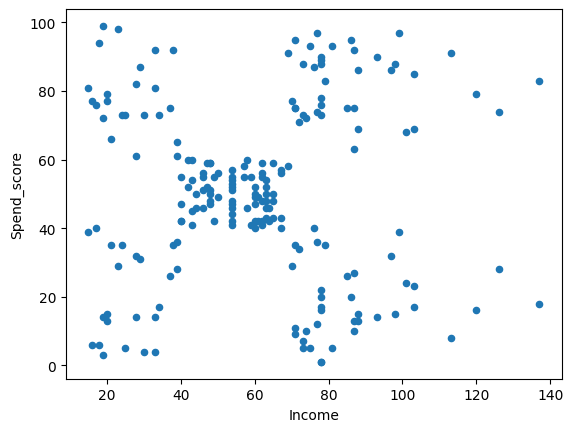

In [8]:
mall.plot.scatter(x='Income', y='Spend_score')
plt.show()

### Стандартизируем данные

In [14]:
mall_scaled = mall.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

scaler = StandardScaler()
mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

### Кластеризуем

In [15]:
cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

## Визуальный метод определения количества кластеров

При 5 кластерах, данные не перекрываются и являются давольно плотными.

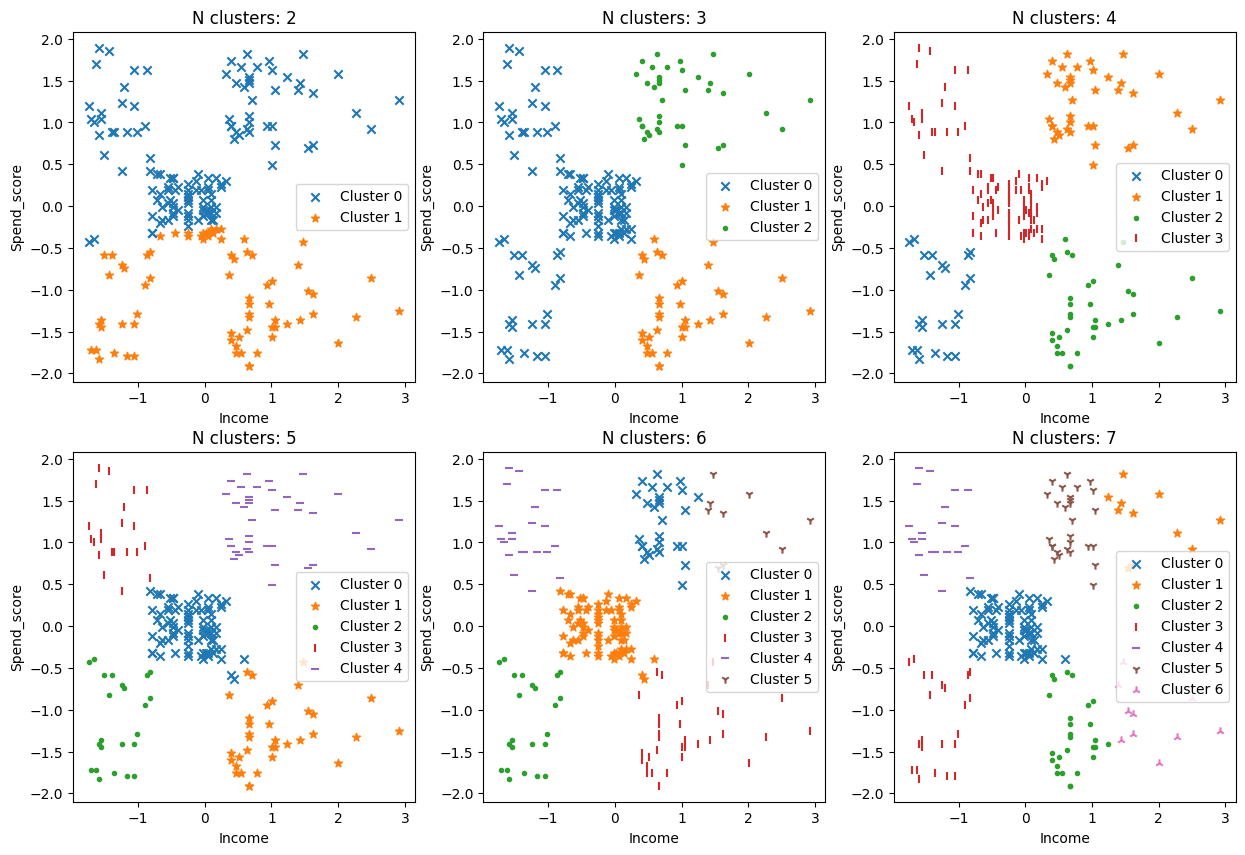

In [19]:
plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict(mall_scaled[cluster_cols])

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score,
                    marker=markers[clust],
                    label="Cluster "+str(clust))
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()

plt.show()

## Метод локтя для определения кол-ва кластеров

In [20]:
number_clusters = 3

In [21]:
model = KMeans(n_clusters=number_clusters, random_state=42)
model.fit(mall_scaled[cluster_cols])

KMeans(n_clusters=3, random_state=42)

Ошибка SSE

In [22]:
print(model.inertia_)

157.70400815035947


In [23]:
data = mall_scaled[cluster_cols]

In [24]:
inertia_scores = []
for i in range(2,11):
    inertia = KMeans(n_clusters=i, random_state=42).fit(data).inertia_
    inertia_scores.append(inertia)

При i=5, на графике, появляется изгиб, соответсвенно оптимальное кол-во кластеров для KMeans будет 5

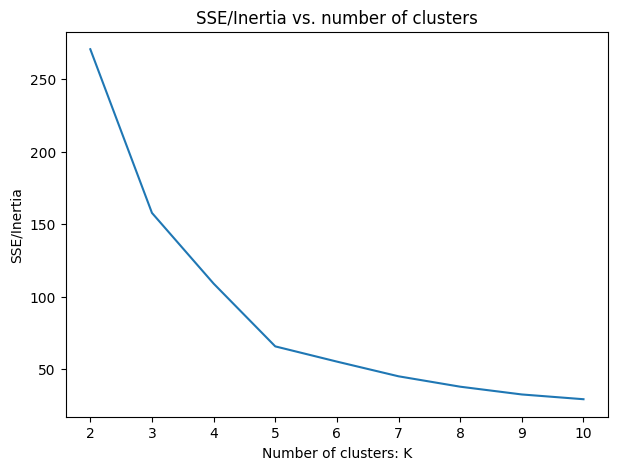

In [25]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores)
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()